In [2]:
# import libraries and functions

import pandas as pd
from scipy.stats import gennorm, genextreme, pearson3, genlogistic, weibull_min, weibull_max
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest

**Part 1: Preprocess and transform data**

In [3]:
# read csv into dataframe

df = pd.read_csv('export_table.csv')
df.head()

,OID_,pointid,grid_code
0,1,1,0.491203
1,2,2,0.490929
2,3,3,0.452032
3,4,4,0.451333
4,5,5,0.490875


In [4]:
# transform units into mm/day
df['mday'] = df['grid_code'].divide(365)
df.drop(['OID_','pointid','grid_code'], axis='columns', inplace=True)
df.head()

,mday
0,0.001346
1,0.001345
2,0.001238
3,0.001237
4,0.001345


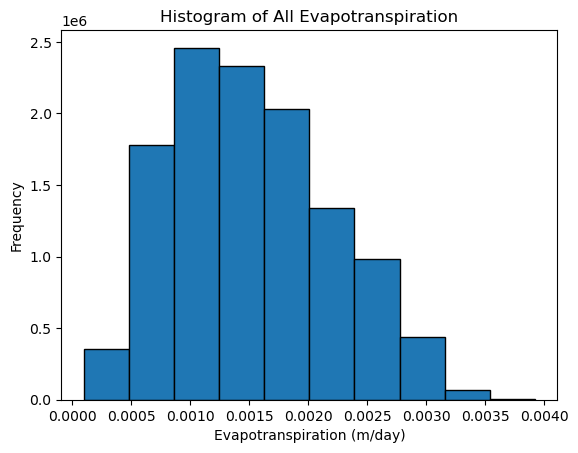

In [4]:
# plot histogram

plt.hist(df['mday'], edgecolor='black')
plt.title('Histogram of All Evapotranspiration')
plt.xlabel('Evapotranspiration (m/day)')
plt.ylabel('Frequency')
plt.show()

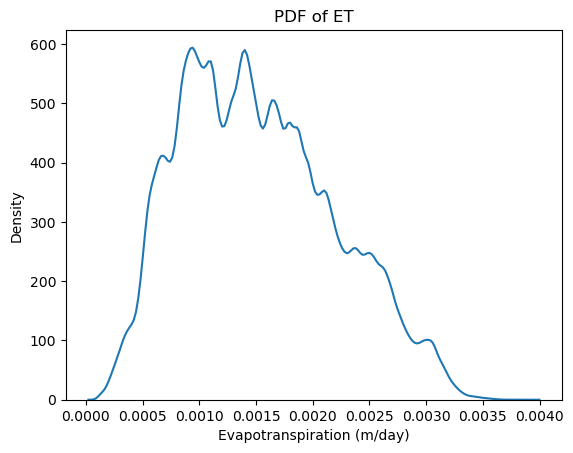

In [5]:
# plot pdf 

sns.kdeplot(df['mday'], bw_adjust=1, fill=False)
plt.title('PDF of ET')
plt.xlabel('Evapotranspiration (m/day)')
plt.ylabel('Density')

plt.show()

In [6]:
# produce descriptive statistics

df.describe()

,mday
count,1.178678e+07
mean,1.520602e-03
std,6.739307e-04
min,9.984384e-05
25%,9.813310e-04
50%,1.447516e-03
75%,1.981961e-03
max,3.919803e-03


In [7]:
df['mday'].median()

0.0014475158904109589

**Part 2: Fit to distributions**

3.5292542950607966 0.0015916695007899707 0.0011453990943165624


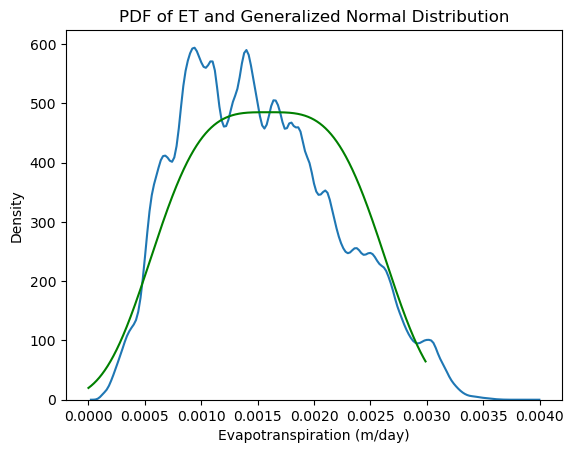

             values
count  1.178678e+07
mean   1.494345e-03
std    8.627608e-04
min    0.000000e+00
25%    7.471726e-04
50%    1.494345e-03
75%    2.241518e-03
max    2.988691e-03


In [8]:
# fit et values to generalized normal dist

# generate parameters for generalized norm dist
shape_gn, loc_gn, scale_gn = gennorm.fit(df)
print(shape_gn, loc_gn, scale_gn)

# generate sample gennorm dist given params
x = np.linspace(0, gennorm.ppf(0.99, shape_gn, loc_gn, scale_gn), 11786780)
pdf = gennorm.pdf(x, shape_gn, loc_gn, scale_gn)

sns.kdeplot(df['mday'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot gennorm pdf

plt.title('PDF of ET and Generalized Normal Distribution')
plt.xlabel('Evapotranspiration (m/day)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

0.13862882626061096 0.001240802832220079 0.0006019653685833142


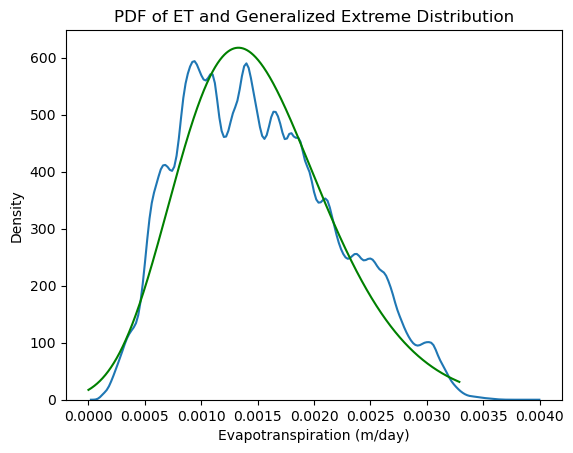

             values
count  1.178678e+07
mean   1.644095e-03
std    9.492189e-04
min    0.000000e+00
25%    8.220476e-04
50%    1.644095e-03
75%    2.466143e-03
max    3.288190e-03


In [9]:
# fit et values to gev

# generate parameters for gev dist
shape_gev, loc_gev, scale_gev = genextreme.fit(df)
print(shape_gev, loc_gev, scale_gev)

# generate sample gev dist given params
x = np.linspace(0, genextreme.ppf(0.99, shape_gev, loc_gev, scale_gev), 11786780)
pdf = genextreme.pdf(x, shape_gev, loc_gev, scale_gev)

sns.kdeplot(df['mday'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot gennorm pdf

plt.title('PDF of ET and Generalized Extreme Distribution')
plt.xlabel('Evapotranspiration (m/day)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

0.7685473893709538 0.00152060205705153 0.0006898842450664499


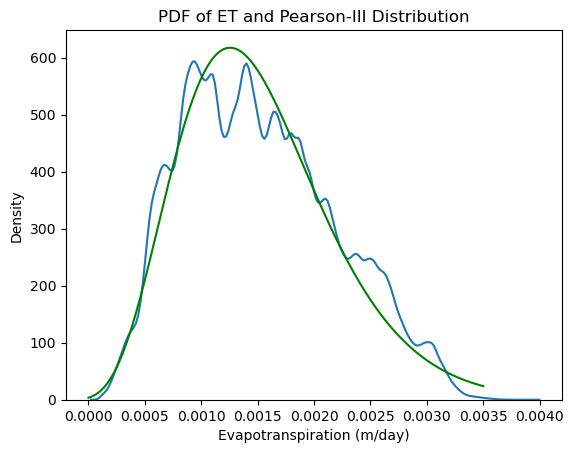

             values
count  1.178678e+07
mean   1.750256e-03
std    1.010511e-03
min    0.000000e+00
25%    8.751280e-04
50%    1.750256e-03
75%    2.625384e-03
max    3.500512e-03


In [10]:
# fit et values to pearson 3

# generate parameters for p3 dist
skew_p3, loc_p3, scale_p3 = pearson3.fit(df)
print(skew_p3, loc_p3, scale_p3)

# generate sample p3 dist given params
x = np.linspace(0, pearson3.ppf(0.99, skew_p3, loc_p3, scale_p3), 11786780)
pdf = pearson3.pdf(x, skew_p3, loc_p3, scale_p3)

sns.kdeplot(df['mday'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot p3 pdf

plt.title('PDF of ET and Pearson-III Distribution')
plt.xlabel('Evapotranspiration (m/day)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

54.37075865691192 -0.0010725747523366454 0.0005700632729016167


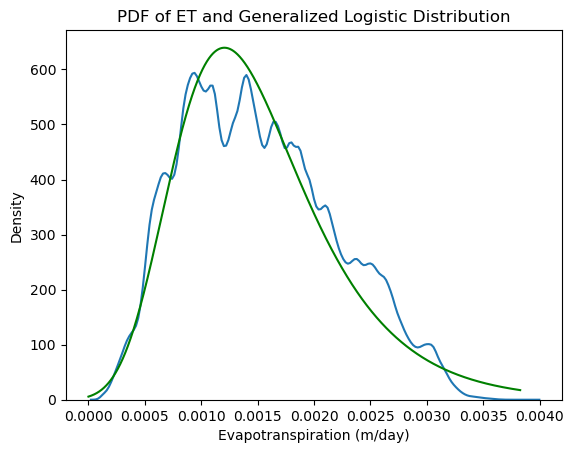

             values
count  1.178678e+07
mean   1.913811e-03
std    1.104940e-03
min    0.000000e+00
25%    9.569057e-04
50%    1.913811e-03
75%    2.870717e-03
max    3.827623e-03


In [11]:
# fit et values to general logistic

# generate parameters for glo dist
shape_glo, loc_glo, scale_glo = genlogistic.fit(df)
print(shape_glo, loc_glo, scale_glo)

# generate sample glo dist given params
x = np.linspace(0, genlogistic.ppf(0.99, shape_glo, loc_glo, scale_glo), 11786780)
pdf = genlogistic.pdf(x, shape_glo, loc_glo, scale_glo)

sns.kdeplot(df['mday'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot genlog pdf

plt.title('PDF of ET and Generalized Logistic Distribution')
plt.xlabel('Evapotranspiration (m/day)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

2.244704651662917 9.980701547345608e-05 0.0016059686061913807


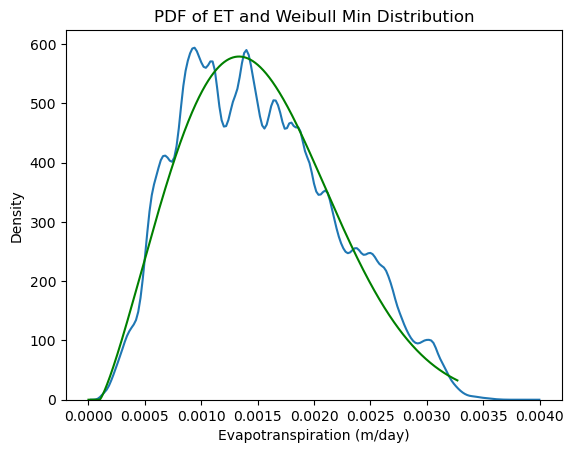

             values
count  1.178678e+07
mean   1.635448e-03
std    9.442262e-04
min    0.000000e+00
25%    8.177238e-04
50%    1.635448e-03
75%    2.453171e-03
max    3.270895e-03


In [5]:
# fit et values to weibull min

# generate parameters for weibull min dist
shape_weimin, loc_weimin, scale_weimin = weibull_min.fit(df)
print(shape_weimin, loc_weimin, scale_weimin)

# generate sample gev dist given params
x = np.linspace(0, weibull_min.ppf(0.99, shape_weimin, loc_weimin, scale_weimin), 11786780)
pdf = weibull_min.pdf(x, shape_weimin, loc_weimin, scale_weimin)

sns.kdeplot(df['mday'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot weibull min pdf

plt.title('PDF of ET and Weibull Min Distribution')
plt.xlabel('Evapotranspiration (m/day)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

4.3714844507167925 0.004015331319998348 0.002744815843132001


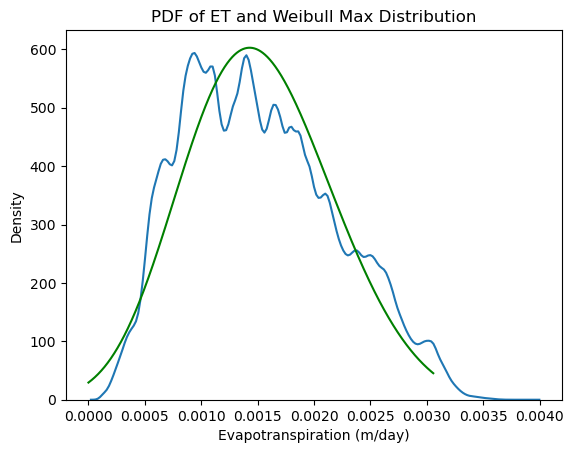

             values
count  1.178678e+07
mean   1.528516e-03
std    8.824890e-04
min    0.000000e+00
25%    7.642578e-04
50%    1.528516e-03
75%    2.292773e-03
max    3.057031e-03


In [6]:
# fit et values to weibull max

# generate parameters for weibull max dist
shape_weimax, loc_weimax, scale_weimax = weibull_max.fit(df)
print(shape_weimax, loc_weimax, scale_weimax)

# generate sample gev dist given params
x = np.linspace(0, weibull_max.ppf(0.99, shape_weimax, loc_weimax, scale_weimax), 11786780)
pdf = weibull_max.pdf(x, shape_weimax, loc_weimax, scale_weimax)

sns.kdeplot(df['mday'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot weibull max pdf

plt.title('PDF of ET and Weibull Max Distribution')
plt.xlabel('Evapotranspiration (m/day)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

In [14]:
# perform KS tests

dists = {
    'gennorm': (shape_gn, loc_gn, scale_gn),
    'genextreme': (shape_gev, loc_gev, scale_gev),
    'pearson3': (skew_p3, loc_p3, scale_p3),
    'genlogistic': (shape_glo, loc_glo, scale_glo),
    'weibull_min': (shape_weimin, loc_weimin, scale_weimin),
    'weibull_max': (shape_weimax, loc_weimax, scale_weimax)
}

for dist in dists:
    print(dist + ': ' + str(kstest(df['mday'], dist, dists[dist])) + '\n')

gennorm: KstestResult(statistic=0.07215405739701264, pvalue=0.0, statistic_location=0.0015064769863013699, statistic_sign=1)

genextreme: KstestResult(statistic=0.03343240596542646, pvalue=0.0, statistic_location=0.0011230175342465754, statistic_sign=1)

pearson3: KstestResult(statistic=0.026129120204373857, pvalue=0.0, statistic_location=0.0017751276712328766, statistic_sign=-1)

genlogistic: KstestResult(statistic=0.034816341374188764, pvalue=0.0, statistic_location=0.0017657572602739727, statistic_sign=-1)

weibull_min: KstestResult(statistic=0.026014122699602182, pvalue=0.0, statistic_location=0.0011260424657534248, statistic_sign=1)

weibull_max: KstestResult(statistic=0.046388582931913835, pvalue=0.0, statistic_location=0.001128242191780822, statistic_sign=1)

